<a href="https://colab.research.google.com/github/Pranilkumaravel/CODSOFT/blob/main/titanic_survival_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived

/tmp/ipython-input-3327544976.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


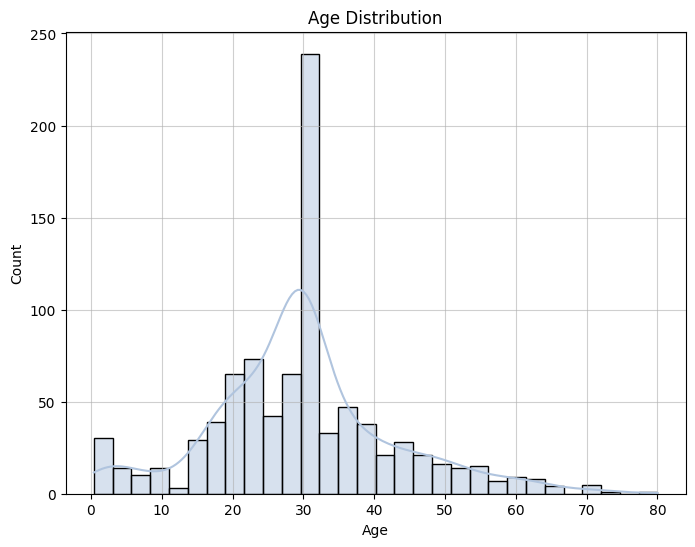

/tmp/ipython-input-3327544976.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Age', data=df, palette='flare')


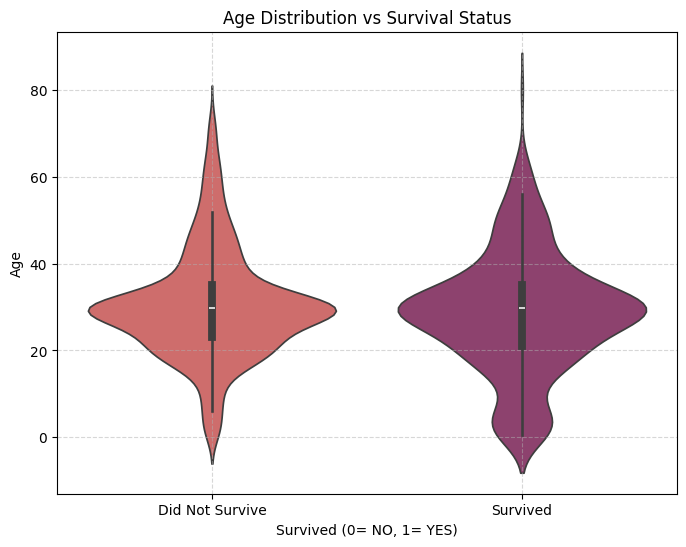

In [2]:
df = pd.read_csv(list(uploaded.keys())[0])
df.head()
df.info()
df.describe()
df['Age'].fillna(df['Age'].mean(), inplace = True)
df=pd.get_dummies(df, columns=['Sex','Embarked'], drop_first = False)
df.info()
X=df.drop('Survived',axis=1)
Y=df['Survived']
X = X.drop(['Name', 'Ticket', 'Cabin'], axis=1)
X = X.astype("float64")
plt.figure(figsize=(8,6))
sns.histplot(df,x="Age", color='lightsteelblue', kde=True)
plt.grid(True,alpha=0.6)
plt.xlabel("Age")
plt.ylabel('Count')
plt.title("Age Distribution")
plt.show()
plt.figure(figsize=(8,6))
sns.violinplot(x='Survived', y='Age', data=df, palette='flare')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.xlabel('Survived (0= NO, 1= YES)')
plt.ylabel('Age')
plt.grid(True, linestyle='--',alpha=0.5)
plt.title("Age Distribution vs Survival Status")
plt.show()